1 - Utilizando os dados criados por vcs faça
1.1 - Criar um pipeline com uma árvore de decisão (pensar sobre o uso ou não de PCA no pipeline)
1.2 - Faça um gridsearch para achar os melhores parâmetros da árvore (inclua parâmetros de pre-prunning e post-prunning)
1.3 - Estime, em cima da base de dados de teste, a acurácia final, dada a melhor combinação de hyperparâmetros possíveis
1.4 - Escolha uma amostra única e faça inferência (predict) sobre ela. Interprete, textualmente (em formato de regras if else) o por que essa amostra foi classificada como classe X
1.5 - Compartilhar o link (no colab, botão superior direito, compartilhar, alterar opção para "qualquer um com link pode visualizar", copiar link, e colar o link aqui para verificação)

**Importing Libraries and Data**

In [1]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import GridSearchCV

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dados&colunas.csv')

#Setting 'eastern' as 0 and 'western' as 1
d = {'eastern': 0,'western': 1}
df['Region'] = df['Region'].map(d)

X = df.iloc[:,:4].values #features
y = df['Region'].values #class

**1.1 - Criar um pipeline com uma árvore de decisão (pensar sobre o uso ou não de PCA no pipeline)**

**1.2 - Faça um gridsearch para achar os melhores parâmetros da árvore (inclua parâmetros de pre-prunning e post-prunning)**

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, shuffle=True, random_state=0, stratify=y)

pipe = Pipeline([('scaler', StandardScaler()), ('tree', tree.DecisionTreeClassifier())]) #creating pipeline

parameters = {'tree__min_samples_split':[2,3,4], 'tree__max_depth':[2,3,4,5,6,7], 'tree__min_samples_leaf':[10,9,8,7,6,5,4,3], 'tree__ccp_alpha':[0,0.1,0.5,0.7,1]} #different parameters
grid = GridSearchCV(pipe, param_grid=parameters) #creating grid and testing with params
grid.fit(X_train, y_train) #fitting train set

print("Best Estimator:")
print(grid.best_estimator_)
score = grid.best_score_
print("\nBest Score:")
print("%.2f"%(score*100)+"%")

Best Estimator:
Pipeline(steps=[('scaler', StandardScaler()),
                ('tree',
                 DecisionTreeClassifier(ccp_alpha=0, max_depth=2,
                                        min_samples_leaf=7,
                                        min_samples_split=3))])

Best Score:
75.00%


**1.3 - Estime, em cima da base de dados de teste, a acurácia final, dada a melhor combinação de hyperparâmetros possíveis**

In [3]:
test_score = grid.score(X_test,y_test) #grid.score already uses best_estimator_ method
print("Final Accuracy: "+"%.2f"%(test_score*100)+"%")

Final Accuracy: 72.73%


**1.4 - Escolha uma amostra única e faça inferência (predict) sobre ela. Interprete, textualmente (em formato de regras if else) o por que essa amostra foi classificada como classe X**

[Text(0.5, 0.5, 'gini = 0.496\nsamples = 11\nvalue = [6, 5]')]

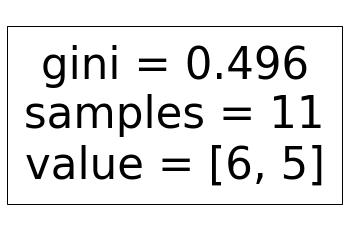

In [4]:
clf = tree.DecisionTreeClassifier(max_depth=2,min_samples_leaf=7,min_samples_split=3) #tree with best params
clf = clf.fit(X_test, y_test)
tree.plot_tree(clf)